# K-mean Cluster

Resources: 

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://www.youtube.com/watch?v=EItlUEPCIzM&ab_channel=codebasics

In [47]:
import warnings;
warnings.simplefilter('ignore')

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6

In [49]:
df = pd.read_csv('df_for_cluster.csv', index_col=0)

In [50]:
df.sort_values(by=['amount'], ascending=False)

,frequency,amount
phrase,,
cyber physical,99,90468512.0
cyber-physical systems,434,90199411.0
mobile users,69,89229327.0
social networks,101,82746868.0
service providers,121,82745969.0
...,...,...
deep learning,219,19735328.0
hardware embedded,35,14953507.0
operating systems,118,11077173.0


Text(0, 0.5, 'frequency')

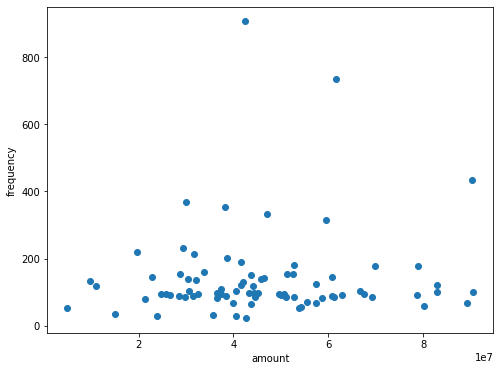

In [51]:
plt.scatter(df['amount'],df['frequency'])
plt.xlabel('amount')
plt.ylabel('frequency')

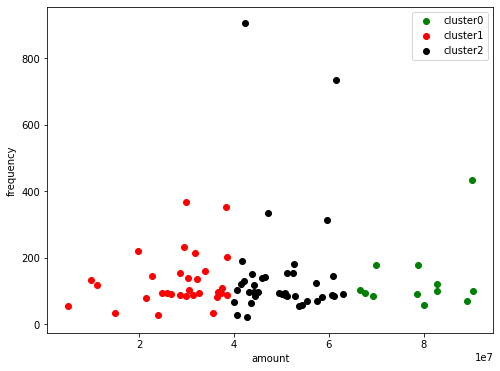

In [52]:
km1 = KMeans(n_clusters=3)
y_predicted = km1.fit_predict(df[['amount','frequency']])
df['cluster'] = y_predicted
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.amount,df1['frequency'], color='green', label='cluster0')
plt.scatter(df2.amount,df2['frequency'], color='red',label='cluster1')
plt.scatter(df3.amount,df3['frequency'], color='black',label='cluster2')

plt.xlabel('amount')
plt.ylabel('frequency')
plt.legend()

In [53]:
scaler = MinMaxScaler()
df_norm = df.copy()
scaler.fit(df_norm[['amount']])
df_norm['amount'] = scaler.transform(df_norm[['amount']])

scaler.fit(df_norm[['frequency']])
df_norm['frequency'] = scaler.transform(df_norm[['frequency']])

In [54]:
km = KMeans(n_clusters=4)
y_predicted1 = km.fit_predict(df_norm[['amount','frequency']])
df_norm['cluster'] = y_predicted1
df1_norm = df_norm[df_norm.cluster == 0]
df2_norm = df_norm[df_norm.cluster == 1]
df3_norm = df_norm[df_norm.cluster == 2]
df4_norm = df_norm[df_norm.cluster == 3]

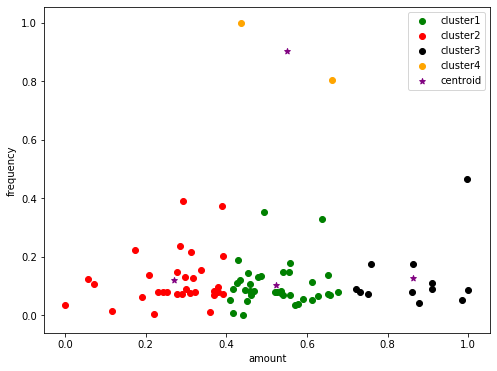

In [55]:
plt.scatter(df1_norm.amount,df1_norm['frequency'], color='green', label='cluster1')
plt.scatter(df2_norm.amount,df2_norm['frequency'], color='red',label='cluster2')
plt.scatter(df3_norm.amount,df3_norm['frequency'], color='black',label='cluster3')
plt.scatter(df4_norm.amount,df4_norm['frequency'], color='orange',label='cluster4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('amount')
plt.ylabel('frequency')
plt.legend()

In [56]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_norm[['amount','frequency']])
    sse.append(km.inertia_)

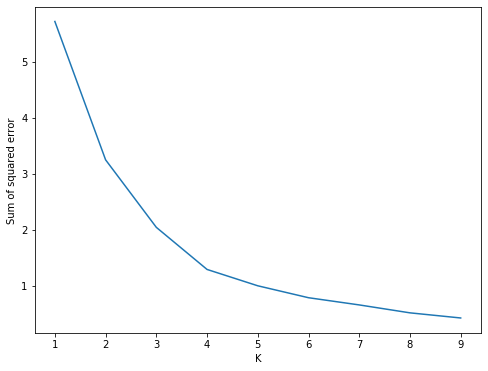

In [57]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)